In [1]:
import pandas as pd
import plotly.express as px
import country_converter as coco
import numpy as np
import os
import seaborn as sns
#pip install plotly
#pip install nbformat
import matplotlib.pyplot as plt
import copy
import random

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
# pip install country_converter --upgrade
country_numeric  = [4, 8, 10, 12, 16, 20, 24, 28, 31, 32, 36, 40, 44, 48, 50, 51, 52, 56, 60, 64, 68, 70, 72, 74, 76, 84, 86, 90, 92, 96, 100, 104, 108, 112, 116, 120, 124, 132, 136, 140, 144, 148, 152, 156, 158, 162, 166, 170, 174, 175, 178, 180, 184, 188, 191, 192, 196, 203, 204, 208, 212, 214, 218, 222, 226, 231, 232, 233, 234, 238, 239, 242, 246, 248, 250, 254, 258, 260, 262, 266, 268, 270, 275, 276, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 334, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 398, 400, 404, 408, 410, 414, 417, 418, 422, 426, 428, 430, 434, 438, 440, 442, 446, 450, 454, 458, 462, 466, 470, 474, 478, 480, 484, 492, 496, 498, 499, 500, 504, 508, 512, 516, 520, 524, 528, 531, 533, 534, 535, 540, 548, 554, 558, 562, 566, 570, 574, 578, 580, 581, 583, 584, 585, 586, 591, 598, 600, 604, 608, 612, 616, 620, 624, 626, 630, 634, 638, 642, 643, 646, 652, 654, 659, 660, 662, 663, 666, 670, 674, 678, 682, 686, 688, 690, 694, 702, 703, 704, 705, 706, 710, 716, 724, 728, 729, 732, 740, 744, 748, 752, 756, 760, 762, 764, 768, 772, 776, 780, 784, 788, 792, 795, 796, 798, 800, 804, 807, 818, 826, 831, 832, 833, 834, 840, 850, 854, 858, 860, 862, 876, 882, 887, 894]
country_iso3 = ['AFG', 'ALB', 'ATA', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'AZE', 'ARG', 'AUS', 'AUT', 'BHS', 'BHR', 'BGD', 'ARM', 'BRB', 'BEL', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BVT', 'BRA', 'BLZ', 'IOT', 'SLB', 'VGB', 'BRN', 'BGR', 'MMR', 'BDI', 'BLR', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'LKA', 'TCD', 'CHL', 'CHN', 'TWN', 'CXR', 'CCK', 'COL', 'COM', 'MYT', 'COG', 'COD', 'COK', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'BEN', 'DNK', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ', 'ETH', 'ERI', 'EST', 'FRO', 'FLK', 'SGS', 'FJI', 'FIN', 'ALA', 'FRA', 'GUF', 'PYF', 'ATF', 'DJI', 'GAB', 'GEO', 'GMB', 'PSE', 'DEU', 'GHA', 'GIB', 'KIR', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'CIV', 'JAM', 'JPN', 'KAZ', 'JOR', 'KEN', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LBN', 'LSO', 'LVA', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MCO', 'MNG', 'MDA', 'MNE', 'MSR', 'MAR', 'MOZ', 'OMN', 'NAM', 'NRU', 'NPL', 'NLD', 'CUW', 'ABW', 'SXM', 'BES', 'NCL', 'VUT', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NFK', 'NOR', 'MNP', 'UMI', 'FSM', 'MHL', 'PLW', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'GNB', 'TLS', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA', 'BLM', 'SHN', 'KNA', 'AIA', 'LCA', 'MAF', 'SPM', 'VCT', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'VNM', 'SVN', 'SOM', 'ZAF', 'ZWE', 'ESP', 'SSD', 'SDN', 'ESH', 'SUR', 'SJM', 'SWZ', 'SWE', 'CHE', 'SYR', 'TJK', 'THA', 'TGO', 'TKL', 'TON', 'TTO', 'ARE', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'MKD', 'EGY', 'GBR', 'GGY', 'JEY', 'IMN', 'TZA', 'USA', 'VIR', 'BFA', 'URY', 'UZB', 'VEN', 'WLF', 'WSM', 'YEM', 'ZMB']
country_names_url = "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/CountryNames.csv"


In [2]:
# Building the main CSV based on multiple ones avaliable. Saves it so that you can once run that code and then operate on the nice CSV easly read to DataFrame. This make life easier and faster if you want to change sth.
### =======================================================
# Step 0: Upload your csv to github
# Step 1: Copy the url from github for the raw file. Please use the raw url, which can be found by clicking the "Raw" button
urls = ["https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Births_per_woman_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/countries-population-density.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/gdp-per-capita-maddison-project-database.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Beds_Per_1000.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Maternal_Mortality.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/bc737bc557bc8145f7f914974dd6198a778a13a9/Data_Organization/CSV_Uploads/Rockford/Population_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/AdolescentBirthRate_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/GGHD_as_CHE_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Em/statacap.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Me/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_76261.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Me/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_76317.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Me/API_SI.POV.GINI_DS2_en_csv_v2_114293.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Ta/AdolescentBirthRate_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Ta/ShareOfPopulation_ExtremePoverty.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Ta/ShareOfPopulation_Urban.csv"
        , "https://github.com/MariaStefaniak/SurvivalAtBirth_Global/blob/main/Data_Organization/CSV_Uploads/Rockford/Mortality_Ratio_difference_2019_1985.csv"
        , "https://github.com/MariaStefaniak/SurvivalAtBirth_Global/blob/main/Data_Organization/CSV_Uploads/Emirhan/vdem2020_cleaned.csv"]


for ii in range(len(urls)):
    if "github.com" in urls[ii]:
        urls[ii] = urls[ii].replace("https://github.com", "https://raw.githubusercontent.com")
        urls[ii] = urls[ii].replace("blob", "refs/heads")

# This begins the new dataframe that is preloaded with the country names
country_names_url = "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/CountryNames.csv"
country_df = pd.read_csv(country_names_url, index_col=0)

# This reads in the csv for each one listed, and adds their columns and rows to the new dataframe
for csv in urls:
    df = pd.read_csv(csv, index_col=0)
     #  Rename the current indexes to ISO3
    for ii in range(len(df)):
        old_name = df.iloc[ii].name
        new_name = coco.convert(names = df.iloc[ii].name, to = "ISO3")
        if new_name != "not found":
            df.rename(index={old_name:new_name},inplace=True)


    # WARNING: If column names are repeated between csv files, then things will be over written
    # Example of a bad case. You have two csv's, "Population.csv" and "GDP.csv", and the columns of both are 1991, 1992, 1993, and 1994
    # Then they will overwrite each other. 
    # Solution: Rename your columns to Population_1991 and GDP_1991

    # if there are duplicated indexes: drop both        
    df = df[~df.index.duplicated(keep=False)]

    # Add in data from df for each country that is in the dataframe
    intersection = list(set(df.index) & set(country_df.index)) 
    country_df.loc[intersection, df.columns] = df.loc[intersection]         
            

country_df.drop("Unnamed: 1", axis=1, inplace=True)
country_df.to_csv('my_main_country_db.csv')  # index=False prevents writing row numbers
country_df.head()


Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

,Births_per_woman_2019,Population_Density_2010,GDP_per_capita_2022,beds_per_1000,Maternal_mortality_ratio _2019,Population_2019,Adolescent_Birth_Rate_2019,GGHD_as_CHE_2019,VDem_2015,WBregion_2015,...,e_v2x_genpp_5C,e_v2x_libdem_5C,e_v2x_liberal_5C,e_wbgi_gee,e_wbgi_pve,e_peedgini,e_miferrat,e_pechmor,e_pematmor,e_wb_pop
ABW,1.486,600.000000,NaN,NaN,NaN,109203.0,20.99,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,4.870,52.719133,1357.9878,0.34,644.0,37856121.0,NaN,3.0,36.0,7.0,...,1.0,0.0,0.25,-1.610,-2.703,NaN,5.15,58.08,NaN,38972230.0
AGO,5.442,15.306008,6118.9050,NaN,228.0,32375632.0,NaN,45.0,104.0,8.0,...,1.0,0.0,0.25,-1.258,-0.601,NaN,5.37,72.29,NaN,33428486.0
ALB,1.414,116.970803,12978.1010,2.91,5.0,2854191.0,NaN,43.0,12.0,3.0,...,1.0,0.5,1.00,-0.155,0.089,NaN,1.37,8.52,NaN,2837849.0
AND,NaN,180.561702,NaN,NaN,NaN,76474.0,2.53,71.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
mainDataFrame = pd.read_csv('my_main_country_db.csv', index_col=0)

In [4]:
mainDataFrame.head()

,Births_per_woman_2019,Population_Density_2010,GDP_per_capita_2022,beds_per_1000,Maternal_mortality_ratio _2019,Population_2019,Adolescent_Birth_Rate_2019,GGHD_as_CHE_2019,VDem_2015,WBregion_2015,...,e_v2x_genpp_5C,e_v2x_libdem_5C,e_v2x_liberal_5C,e_wbgi_gee,e_wbgi_pve,e_peedgini,e_miferrat,e_pechmor,e_pematmor,e_wb_pop
ABW,1.486,600.000000,NaN,NaN,NaN,109203.0,20.99,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,4.870,52.719133,1357.9878,0.34,644.0,37856121.0,NaN,3.0,36.0,7.0,...,1.0,0.0,0.25,-1.610,-2.703,NaN,5.15,58.08,NaN,38972230.0
AGO,5.442,15.306008,6118.9050,NaN,228.0,32375632.0,NaN,45.0,104.0,8.0,...,1.0,0.0,0.25,-1.258,-0.601,NaN,5.37,72.29,NaN,33428486.0
ALB,1.414,116.970803,12978.1010,2.91,5.0,2854191.0,NaN,43.0,12.0,3.0,...,1.0,0.5,1.00,-0.155,0.089,NaN,1.37,8.52,NaN,2837849.0
AND,NaN,180.561702,NaN,NaN,NaN,76474.0,2.53,71.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
class Country_Regressor():
    def __init__(self,df_in):
        # Initiate the class with the input dataframe 
        self.og_df = df_in
    
    def Print_Head(self, rows = 20):
        self.og_df.head(rows)

    def Print_Features(self):
        print(self.og_df.columns)

    def Feature_Selection_Clustering(self, features_list):
        # If you would like to cluster manually, then make a new column in the csv with the cluster assignments you would like, and use that as the feature for clustering
        # Make sure when you select number of clusters later that it is the same as the number of clusters you intend to use.
        # Example use case: cluster by continent. Then treat Africa, NA, SA, Europe, Asia, Austrailia as 0, 1, 2, 3, 4, and 5. Number of clusters = 6
        self.features4cluster = features_list
    
    def Feature_Selection_Model(self, features_list):
        self.features4model = features_list

    def Clean_4_Clustering(self):
        # Clean self.og_df
        df_temp = self.og_df[self.features4cluster].copy()
        # All NaNs, zeros, and non-numeric are replaced with blank string:
        df_temp = df_temp.applymap(
            lambda x: x if (pd.api.types.is_number(x) and not pd.isna(x) and x != 0) else ''
        )
        # Drops rows with any blank entries:
        self.df4Clustering = df_temp[~(df_temp == '').any(axis=1)].copy()
        self.df4Clustering.head()  
        return self.df4Clustering
    
    def Clean_4_Modeling(self):
        # Clean self.og_df
        df_temp = self.Xad.copy()
        # All NaNs, and non-numeric are replaced with blank string:
        df_temp = df_temp.applymap(
          #  lambda x: x if (pd.api.types.is_number(x) and not pd.isna(x) and x != 0) else ''
            lambda x: x if (pd.api.types.is_number(x) and not pd.isna(x)) else ''
        )
        # # This turns zeroes from the features into dropped rows. 
        # # We should not do this for cluster_id or alive vs dead since 0 is used in those by design
       # for ii in range(len(self.features4model) - 1):
       #     df_temp[self.features4model[ii]] = df_temp[self.features4model[ii]].applymap(
       #       lambda x: x if (pd.api.types.is_number(x) and not pd.isna(x) and x != 0) else ''
       #      )
        # Drops rows with any blank entries:
        self.Xad = df_temp[~(df_temp == '').any(axis=1)].copy()
        #print("Warning: Rocky removed the part that drops rows that have zeros")
        #print("Fix required: drop rows that have zeros in specific features/columns")
        #Maria puts it back and adds  condition which will print the warning that we do not have sufficient countries in given cluster with selected feature
        # Now check cluster sizes (assuming 'cluster_id' is in the DataFrame)
        if 'cluster_id' in self.Xad.columns:
            cluster_counts = self.Xad['cluster_id'].value_counts()

            insufficient_clusters = cluster_counts[cluster_counts < 10]  # Example: at least 5 countries per cluster

            if not insufficient_clusters.empty:
                print("⚠️ Warning: The following clusters have too few countries for reliable modeling:")
                print(insufficient_clusters)
                print("💡 Consider selecting different features for modeling to retain more data.")



    def Cluster_Numer_Estimation(self,  seed = 3425):
        #copy of the df which will have only features we need for clustering:
        df_temp = self.df4Clustering[self.features4cluster].copy()
        # Normalize the data, i.e. mean zero and std = 1 by column
        df_temp = df_temp.apply(lambda x: (x-x.mean())/ x.std(), axis = 0)

        # Do KMeans clustering for range of clusters, and then plot the mean square error

        cluster_range = 10
        loss = [0] * cluster_range
        for ii in range(cluster_range):
            kmeans = KMeans(n_clusters = ii + 1, random_state = seed, n_init=10)
            kmeans.fit_predict(df_temp.values)
            loss[ii] = kmeans.inertia_
            
        plt.figure()
        plt.plot(range(1, cluster_range + 1), loss)
        plt.xlabel("Number of cluster")
        plt.ylabel("Sum of Square Errors")
        plt.show()

        print('Choose cluster number. Typically chosen by grabbing the "elbow" from the above plot')

    def Cluster_With_kMeans(self, nrclusters=4, seed = 3425):
        
        #copy of the df which will have only features we need for clustering:
        self.df_clusterskMeans = self.df4Clustering[self.features4cluster].copy()
        # Normalize the data, i.e. mean zero and std = 1 by column
        self.df_clusterskMeans = self.df_clusterskMeans.apply(lambda x: (x-x.mean())/ x.std(), axis = 0)
         #the number of cluster is chosen here to be 4 defautly,, you can change it, the seed as well. 
        self.cluster_choice = nrclusters
        #clustering procedure:
        kmeans = KMeans(n_clusters = self.cluster_choice, random_state = seed, n_init=10).fit_predict(self.df_clusterskMeans.values)
        country_list = [[self.df_clusterskMeans.iloc[ii].name for ii in range(len(kmeans)) if kmeans[ii] == jj] for jj in range(self.cluster_choice)]
        #adding the column with cluster id to the cleaned table (0,1,2... nrclusters)
        self.df4Clustering['cluster_id'] = kmeans
        self.og_df['cluster_id'] = np.nan
        for ii, ind in enumerate(list(self.df4Clustering.index)):
            self.og_df.loc[ind, 'cluster_id'] = kmeans[ii]
        

    
    def Draw_Clusters(self, seed = 3425):
        # If exactly two columns were chosen, then we can plot the data in a pretty way
        # If exactly three columns were chosen, then we can plot the data in a less pretty way, but I haven't written this yet

        # It might be bad that this runs kMeans again
        if len(self.features4cluster) == 2:
            kmeans = KMeans(n_clusters= self.cluster_choice, random_state=seed, n_init=10)
            y_kmeans = kmeans.fit_predict(self.df_clusterskMeans)
            # Plot the clusters
            plt.scatter(self.df_clusterskMeans.iloc[:, 0], self.df_clusterskMeans.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

            # Plot the centroids
            self.centers = kmeans.cluster_centers_
            plt.scatter(self.centers[:, 0], self.centers[:, 1], c='darkred', s=200, alpha=0.75, marker='X')

            plt.title('K-means Clustering')
            plt.xlabel(self.features4cluster[0])
            plt.ylabel(self.features4cluster[1])
            plt.show()
            
        elif len(self.features4cluster) == 3:
            fig = px.scatter_3d(self.df4Clustering, 
                                x=self.features4cluster[0], 
                                y=self.features4cluster[1], 
                                z=self.features4cluster[2], 
                                color='cluster_id', 
                                labels={self.features4cluster[0]: self.features4cluster[0], 
                                        self.features4cluster[1]: self.features4cluster[1], 
                                        self.features4cluster[2]: self.features4cluster[2], 
                                        'cluster_id': 'Cluster ID'},
                                title="3D Scatter Plot of Clustering Results")

            # Show the plot
            fig.show()

    def Quantile_Division_Into_Groups(self, feature, nrclusters=4):
        #based on one feature divides the data set into nrclusers groups with same number of countries in each:
        self.df_clusterQuantile = self.df4Clustering.copy()
        self.df_clusterQuantile['cluster_nr_quantile'] = pd.qcut(self.df_clusterQuantile[feature], q=nrclusters, labels=range(nrclusters))


    def Print_Cluster_Info(self, seed = 3425):
        kmeans = KMeans(n_clusters= self.cluster_choice, random_state=seed, n_init=10)
        y_kmeans = kmeans.fit_predict(self.df_clusterskMeans)
        self.centers = kmeans.cluster_centers_

        # prints the information about obtained clusers:
        print(f"{'Cluster':<10} | {self.features4cluster[0]:<15} | {self.features4cluster[1]:<15}")
        print("-" * 45)

        # Country_Regressor does not have a center attribute, so these two lines below throw an error
        for i, center in enumerate(self.centers):
            print(f"Cluster {i:<3} | {center[0]:<15.4f} | {center[1]:<15.4f}")  

        # Group by 'cluster_id' and aggregate the index (countries) into lists
        grouped = self.df4Clustering.groupby('cluster_id').apply(lambda x: list(x.index))
        print(grouped)
        # Convert to DataFrame for a clean table
        result = grouped.to_frame(name='Countries')
        #with return we can show it nicely in the form of DF: 
        return result
    
    def Print_Cluster_Info_Short(self, iso3 = True):
        # Group by 'cluster_id' and aggregate the index (countries) into lists
        grouped = self.df4Clustering.groupby('cluster_id').apply(lambda x: list(x.index), include_groups=False)
        if iso3:
            for ii in range(len(grouped)):
                print(grouped.iloc[ii])
        else:
            for ii in range(len(grouped)):
                print([coco.convert(names = name, to = 'name_short') for name in grouped[ii]])

            
    def Plot_Correlations_Per_Cluster(self, cmap='coolwarm'):
  
        clusters = sorted(self.Xad['cluster_id'].unique())

        for cid in clusters:
            cluster_df = self.Xad[self.Xad['cluster_id'] == cid]

            if cluster_df.empty:
                print(f"⚠️ Cluster {cid} has no data, skipping.")
                continue

            # Compute correlation matrix
            corr = cluster_df[self.features4model].corr()

            # Plot
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1, vmax=1)
            plt.title(f"Correlation Matrix - Cluster {cid}")
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()

    def Plot_Covariances_Per_Cluster(self, cmap='Blues'):
        clusters = sorted(self.Xad['cluster_id'].unique())

        for cid in clusters:
            cluster_df = self.Xad[self.Xad['cluster_id'] == cid]

            if cluster_df.empty:
                print(f"⚠️ Cluster {cid} has no data, skipping.")
                continue

            # Compute covariance matrix
            cov = cluster_df[self.features4model].cov()

            # Plot
            plt.figure(figsize=(10, 8))
            sns.heatmap(cov, annot=True, cmap=cmap)
            plt.title(f"Covariance Matrix - Cluster {cid}")
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
    
    def Plot_Pairplot_Per_Cluster(self):
        import seaborn as sns

        clusters = sorted(self.Xad['cluster_id'].unique())

        for cid in clusters:
            cluster_df = self.Xad[self.Xad['cluster_id'] == cid]

            if cluster_df.empty:
                print(f"⚠️ Cluster {cid} has no data, skipping.")
                continue

            sns.pairplot(cluster_df[self.features4model])
            plt.suptitle(f"Pairplot of Features - Cluster {cid}", y=1.02)
            plt.show()
            
    def Plot_Feature_Distributions_Per_Cluster(self, bins=50):
        for cid in sorted(self.Xad['cluster_id'].unique()):
            cluster_df = self.Xad[self.Xad['cluster_id'] == cid]

            if cluster_df.empty:
                print(f"⚠️ Cluster {cid} has no data, skipping.")
                continue

            cleaned = cluster_df[self.features4model].apply(pd.to_numeric, errors='coerce').dropna()

            if cleaned.empty:
                print(f"⚠️ Cluster {cid} has no valid numeric data, skipping.")
                continue

            cleaned.plot(kind='hist', alpha=0.7, bins=bins, subplots=True,
                        layout=(len(self.features4model), 1),
                        figsize=(8, 3 * len(self.features4model)),
                        title=[f"{col} - Cluster {cid}" for col in self.features4model])

            plt.tight_layout()
            plt.show()
                
            
    def Plot_PCA_Per_Cluster(self):
        for cid in sorted(self.Xad['cluster_id'].unique()):
            cluster_df = self.Xad[self.Xad['cluster_id'] == cid]

            if cluster_df.empty:
                print(f"⚠️ Cluster {cid} has no data, skipping.")
                continue

            X = cluster_df[self.features4model]
            X = X.dropna().astype(float)

            if X.shape[0] < 2:
                print(f"⚠️ Cluster {cid} has too few rows for PCA, skipping.")
                continue

            pca = PCA(n_components=2)
            components = pca.fit_transform(X)

            plt.figure(figsize=(6, 5))
            plt.scatter(components[:, 0], components[:, 1], alpha=0.7)
            plt.title(f"PCA Projection - Cluster {cid}")
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    
###### Here I stopped adjusting  < ----------

    def Make_Weights(self, set_weigths=0):
        o_len = len(self.og_df)
        # Check that features were selected. If not, default to first five features
        # We check if the features are selected here because we're also making Xad, which we don't want to include every feature from the Master csv
        if not hasattr(self, 'features4model'):
            print("No features selected. Defaulting to using first four features.")
            print("Feature Selection may be done via Feature_Selection_Model()")
            print("To see options for features, use Print_Features()")
            self.features4model = list(self.og_df.columns[0:4])
            if 'cluster_id' not in self.features4model:
                self.features4model += ['cluster_id']
            print(self.features4model)
        # Split the dataset into two, one which will have the weight Alive, and one that will have the weight for Dead
        # Xad = X, the input, split into Alive (a) and Dead(d) parts
        # Really it should be called df_ad since it has X, Y, and Weights
        self.features4model = list(self.features4model) + ['cluster_id']
        if 'cluster_id' not in self.features4model:
                self.features4model += ['cluster_id']
        self.Xad = pd.concat([self.og_df[self.features4model],self.og_df[self.features4model]])
        self.features4model = self.features4model[:-1]
        self.Xad.index.values[range(o_len)] = self.Xad.index.values[range(o_len)] + "_Dead"
        self.Xad.index.values[range(o_len,2*o_len)] = self.Xad.index.values[range(o_len,2*o_len)] + "_Alive"
        self.Xad["Alive"] = 1
        self.Xad.iloc[0:o_len, -1] = 0
        self.Xad["Weight"] = 0.0
        self.Xad.iloc[:o_len, -1] = self.og_df["Population_2019"] * self.og_df["Maternal_mortality_ratio _2019"] / 100000
        self.Xad["Weight"] = pd.to_numeric(self.Xad["Weight"], errors = "coerce").round().astype('Int64')
        self.Xad.iloc[o_len:2*o_len, -1] = pd.to_numeric(self.og_df["Population_2019"] * (1 - self.og_df["Maternal_mortality_ratio _2019"] / 100000), errors = "coerce").round().astype('Int64')


    def Train_Test_Split(self, speedup = "Infinite"):
        # Example usage: Train_Test_Split("Infinite Speed Up gotta go fast") 
        # Example usage: Train_Test_Split(100) 
        # Does a 80 20 split
        # This is hard coded because sampling with removal on the 8 billion people on earth takes eight hours to run if you go by individuals
        # If you do speedup = 100, then it'll take about five minutes
        # I have a way of speeding this up by a factor of N if you go by batches of people of size N, although that only approximiates the distirbution 
        # I also two theoretical ways of speeding it up so it runs in a few minutes or less (one good version and one bad version)... but I would need to finish working out the math
        countries_names_all = ['CHN','IND','USA','IDN','PAK','NGA','BRA','BGD','RUS','JPN','MEX','ETH','PHL','EGY','VNM','COD','IRN','DEU','TUR','THA','FRA','GBR','ITA','ZAF','TZA','MMR','KOR','KEN','COL','ESP','SDN','ARG','UKR','DZA','UGA','IRQ','POL','AFG','CAN','MAR','YEM','MYS','UZB','PER','AGO','GHA','SAU','MOZ','VEN','NPL','MDG','CIV','PRK','CMR','AUS','NER','LKA','MLI','BFA','SYR','ROU','KAZ','CHL','MWI','ZMB','NLD','ECU','GTM','TCD','KHM','SEN','SOM','ZWE','GIN','RWA','BEN','BDI','TUN','BOL','BEL','CUB','HTI','DOM','GRC','JOR','CZE','SSD','PRT','SWE','AZE','HND','HUN','PNG','TJK','ARE','BLR','ISR','AUT','CHE','TGO','SLE','HKG','LAO','BGR','LBY','SRB','TKM','KGZ','PRY','NIC','SLV','DNK','LBN','SGP','COG','FIN','SVK','NOR','LBR','CRI','NZL','CAF','IRL','PSE','OMN','MRT','KWT','PAN','HRV','GEO','URY','BIH','MNG','ERI','PRI','ARM','ALB','JAM','LTU','MDA','NAM','QAT','GMB','BWA','GAB','LSO','SVN','GNB','LVA','MKD','XKX','GNQ','BHR','TTO','EST','TLS','CYP','MUS','SWZ','DJI','FJI','GUY','COM','BTN','SLB','MAC','MNE','LUX','SUR','CPV','MLT','MDV','BRN','BHS','BLZ','ISL','VUT','NCL','BRB','PYF','STP','WSM','LCA','GUM','CUW','KIR','GRD','FSM','ABW','VIR','TON','VCT','SYC','ATG','IMN','AND','DMA','CYM','BMU','GRL','FRO','ASM','MNP','KNA','MHL','TCA','SXM','LIE','MCO','VGB','GIB','SMR','MAF','PLW','NRU','TUV']
        self.countries_names = self.og_df.index.to_list()

        if type(speedup) == str:
            # ... why did I sort the countries by population size?
            train_all = [1126175209, 1111220306, 262664668, 217983849, 184645202, 167595128, 165963271, 131928636, 116360318, 101308127, 100609844, 92598153, 88643563, 86046476, 77736146, 74357828, 69642781, 66476519, 66061000, 57215605, 53907422, 53466615, 47779749, 47670734, 47339015, 42115302, 41412885, 40961632, 39930976, 37707802, 36435928, 35977827, 35965264, 34631557, 34402935, 32951354, 30370489, 30285945, 30096730, 28971816, 28092689, 26754282, 26369874, 25959039, 25898598, 25007025, 24051523, 23909289, 23151166, 22733268, 22574867, 22555063, 20832014, 20404010, 20268173, 18355908, 17442116, 16857171, 16770964, 16279138, 15495346, 15366372, 15358309, 15221141, 14811981, 13875776, 13874927, 13683230, 13346400, 13184808, 13082845, 12823443, 12214042, 10427854, 10219953, 10182773, 9805017, 9498049, 9336818, 9191406, 8962883, 8882960, 8716377, 8575384, 8538121, 8538740, 8339303, 8228745, 8222291, 8020427, 7953683, 7816224, 7688059, 7623817, 7558905, 7538649, 7242939, 7105899, 6861010, 6768323, 6185228, 6005581, 5790371, 5582907, 5562354, 5556074, 5443176, 5274514, 5212205, 5189136, 4976773, 4650748, 4635792, 4562735, 4493904, 4417008, 4363329, 4277500, 4034791, 3999877, 3985034, 3956010, 3948634, 3747828, 3673944, 3573078, 3553009, 3388954, 3158684, 2976328, 2718758, 2675588, 2613195, 2592506, 2556595, 2368377, 2284398, 2258139, 2235618, 2130784, 2120190, 2111543, 1965421, 1865522, 1814695, 1768230, 1671785, 1574101, 1530675, 1500961, 1431718, 1336025, 1187287, 1090200, 1061737, 1040469, 1029003, 1012748, 944990, 870462, 731604, 646171, 629147, 611959, 582195, 537798, 497704, 496393, 485125, 411628, 403345, 389853, 354786, 315550, 308420, 288624, 233829, 227037, 225286, 223302, 170772, 168134, 142044, 129521, 126280, 98866, 92673, 88193, 87444, 85472, 84707, 83284, 78225, 72925, 67360, 61107, 54333, 53919, 51116, 45028, 41447, 40075, 38578, 37607, 35304, 34602, 32392, 30929, 30428, 29179, 28448, 27567, 27313, 14261, 9262, 8487]
            # test_all = [self.og_df["Population_2019"].loc[countries_names_all[ii]] - train_all[ii] for ii in range(len(train_all))]
            self.train = []
            self.test = []
            for name in self.countries_names:
                if name in countries_names_all:
                    self.train.append(train_all[countries_names_all.index(name)])
                    self.test.append(self.og_df["Population_2019"].loc[name] - self.train[-1])
                else:
                    print("Warning. Someone messed with the master csv and now there's a country that doesn't have a numerical entry in Population_2019")
                    print("This process has failed because of that")
        elif type(speedup) == int and speedup >= 1:
            # This needs to be fixed in a couple of ways
            # 1. Don't use all countries. Only use countries in the og_df
            # 2. It's currently out of order and needs to be sorted in the same way type(speedup) == int needed to be fixed.
            self.test = [1407745000	,1389030312	,328329953	,272489381	,230800899	,209485641	,207455459	,164913055	,145453291	,126633000	,125762982	,115737383	,110804683	,107553158	,97173776	,92947442	,87051648	,83092962	,82579440	,71522271	,67382061	,66836327	,59729081	,59587885	,59174891	,52640713	,51764822	,51202827	,49907985	,47134837	,45548175	,44973465	,44957458	,43294546	,42999637	,41192171	,37965475	,37856121	,37618495	,36210898	,35111408	,33440596	,32964701	,32449303	,32375632	,31258945	,30063799	,29884380	,28938098	,28414064	,28219554	,28193009	,26037632	,25506095	,25334826	,22947757	,21803000	,21068405	,20961952	,20353534	,19371648	,19209555	,19197744	,19025752	,18513839	,17344874	,17340021	,17103803	,16685223	,16481304	,16352922	,16030971	,15271368	,13034346	,12776103	,12726755	,12255336	,11875081	,11671386	,11488980	,11202846	,11105163	,10894043	,10721582	,10671891	,10671870	,10423384	,10286263	,10278887	,10024283	,9943633	,9771141	,9609010	,9529966	,9445785	,9419758	,9054000	,8879920	,8575280	,8463068	,7731991	,7507900	,7237636	,6975761	,6951033	,6945235	,6803944	,6590211	,6515058	,6483657	,6222318	,5814422	,5794594	,5703569	,5616661	,5521606	,5454147	,5347896	,5043721	,4999553	,4979200	,4944703	,4934340	,4685306	,4591241	,4467708	,4442316	,4234700	,3949390	,3720161	,3397206	,3345533	,3267673	,3240194	,3193694	,2962500	,2854191	,2823271	,2794137	,2664224	,2650494	,2638657	,2456844	,2332083	,2267706	,2209405	,2088385	,1967696	,1913822	,1876262	,1788891	,1670177	,1483756	,1363985	,1326898	,1300945	,1286671	,1265985	,1179874	,1088709	,914899	,807665	,786578	,764824	,728147	,672000	,622028	,620001	,605768	,514104	,504062	,487731	,442680	,394675	,385829	,360563	,291985	,283606	,281207	,279034	,213392	,209780	,177661	,161808	,157441	,123921	,115981	,110282	,109203	,106669	,105669	,104167	,97625	,91364	,83957	,76474	,67880	,67327	,64107	,56225	,51795	,50209	,48129	,46952	,44007	,43166	,40385	,38563	,38109	,36395	,35494	,34663	,34267	,17798	,11587	,10581	]
            self.countries = [ii for ii in range(len(self.countries_names))]
            run_length = int(sum(self.test)* .2 / speedup)
            for ii in range(run_length):
                self.test[random.sample(self.countries, counts = self.test,k=1)[0]] -= speedup
            self.test = [self.og_df["Population_2019"].loc[self.countries_names[ii]] - self.test[ii] for ii in range(len(self.test))]
            print("Warning: Weights are currently out of order and need to be sorted like they were in the first if statement")
        else:
            print("This isn't very good code. Sorry -Rocky")


    def Fit(self):
        # An example would be
        # X = self.Xad[self.features4model]
        # Y = self.Xad["Alive"]
        # self.W = self.Xad["Weight"]
        # self.log_reg[k].fit(X, Y, log__sample_weight=W)
        self.log_reg = [Pipeline([('scale', StandardScaler()), 
                          ('log', LogisticRegression(penalty=None))]) 
                for _ in range(self.cluster_choice + 1)]
        
        for ii in range(self.cluster_choice):

            if self.Xad[self.Xad['cluster_id'] == ii].empty:
                print(f"⚠️ Skipping cluster {ii}: no data available after cleaning.")
                continue

            self.log_reg[ii].fit(self.Xad[self.Xad['cluster_id'] == ii][self.features4model]
                                 , self.Xad[self.Xad['cluster_id'] == ii]["Alive"].astype(int)
                                 , log__sample_weight = self.Xad[self.Xad['cluster_id'] == ii]["Weight"])

        self.log_reg[-1].fit(self.Xad[self.features4model], self.Xad["Alive"], log__sample_weight = self.Xad["Weight"])
        
    def Predict(self, X):
        return self.log_reg[-1].predict_proba(X)

    def WMSE(self, country_list, model_number):
        # Calculate Weighted Mean Squared Error
        prediction = self.log_reg[model_number].predict_proba(self.og_df[self.features4model].loc[country_list])
        prediction = [pred[0] * 100000 for pred in prediction]
        true = self.og_df[["Maternal_mortality_ratio _2019"]].loc[country_list].values
        weights = self.og_df[["Population_2019"]].loc[country_list].values
        # Normalize the weights to add to one
        weights = weights / np.sum(weights)
        return (sum([w * (y - yhat) ** 2 for w, y, yhat in zip(weights, true, prediction)])) ** .5 / len(weights)
    



In [27]:
test = Country_Regressor(mainDataFrame)

In [28]:
test.Print_Features()

Index(['Births_per_woman_2019', 'Population_Density_2010',
       'GDP_per_capita_2022', 'beds_per_1000',
       'Maternal_mortality_ratio _2019', 'Population_2019',
       'Adolescent_Birth_Rate_2019', 'GGHD_as_CHE_2019', 'VDem_2015',
       'WBregion_2015', 'sample_polity_2015', 'Capacity_2015',
       'Capacity_sd_2015', 'censusfreq_2015', 'v2clrspct_2015',
       'v2stfisccap_2015', 'v2terr_2015', 'infcap_2015', 'irai_qbfm_2015',
       'irai_qpa_2015', 'irai_erm_2015', 'milexpercap_2015', 'milpercap_2015',
       'policecap_2015', 'StateHist50s_2015', 'bti_mo_2015', 'wbstat_2015',
       'tax_inc_tax_2015', 'tax_trade_tax_2015', 'taxrev_gdp_2015', 'GDP_2019',
       'GDP_per_Capita_2019', 'Gini_2019',
       'Share_of_Pop_in_Extreme Poverty_2019', 'Urban_population_percent_2019',
       'Mortality_Ratio_difference_2019_1985', 'v2x_libdem', 'v2elfemrst',
       'v2elgvsuflvl', 'v2fsuffrage', 'v2pepwrses', 'v2pepwrgen', 'v2clgencl',
       'v2peapsgen', 'v2peapsgeo', 'v2cacamps', 'v

In [29]:
test.Feature_Selection_Clustering(['GDP_per_capita_2022','Mortality_Ratio_difference_2019_1985'])
# test.Feature_Selection_Clustering(['GDP_per_capita_2022','Mortality_Ratio_difference_2019_1985'])


/var/folders/n_/wmbdlzd17s7gcyvkql_0tn3c0000gq/T/ipykernel_44908/2404410997.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_temp = df_temp.applymap(


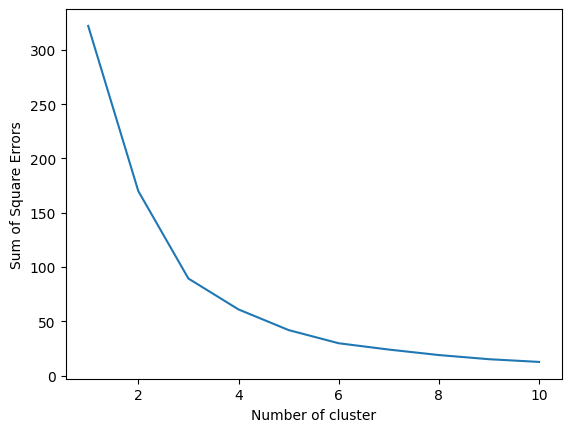

Choose cluster number. Typically chosen by grabbing the "elbow" from the above plot


In [30]:
test.Clean_4_Clustering()
test.Cluster_Numer_Estimation()

In [31]:
test.Cluster_With_kMeans(nrclusters=3)

In [32]:
list(test.df4Clustering.index)
test.og_df.sample(20)

,Births_per_woman_2019,Population_Density_2010,GDP_per_capita_2022,beds_per_1000,Maternal_mortality_ratio _2019,Population_2019,Adolescent_Birth_Rate_2019,GGHD_as_CHE_2019,VDem_2015,WBregion_2015,...,e_v2x_libdem_5C,e_v2x_liberal_5C,e_wbgi_gee,e_wbgi_pve,e_peedgini,e_miferrat,e_pechmor,e_pematmor,e_wb_pop,cluster_id
POL,1.440,125.522682,32468.4020,6.11,2.0,37965475.0,9.40,71.0,17.0,3.0,...,0.50,0.75,0.324,0.492,NaN,1.38,4.13,NaN,37899070.0,2.0
MNP,NaN,132.428261,NaN,NaN,NaN,48129.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVK,1.570,112.913288,27519.2870,5.68,5.0,5454147.0,26.88,79.0,201.0,3.0,...,0.75,1.00,0.502,0.634,NaN,1.59,5.27,NaN,5458827.0,0.0
THA,1.352,135.297226,16421.0720,2.33,29.0,71522271.0,29.70,72.0,49.0,2.0,...,0.00,0.50,0.202,-0.578,NaN,1.26,8.49,NaN,71475664.0,0.0
LAO,2.571,26.867418,7168.1904,1.27,153.0,7237636.0,NaN,37.0,123.0,2.0,...,0.00,0.25,-0.738,0.694,NaN,2.54,43.90,NaN,7319399.0,1.0
GIN,4.576,40.623474,1809.2666,NaN,556.0,13034346.0,132.56,23.0,63.0,8.0,...,0.00,0.25,-0.970,-0.669,NaN,4.49,94.26,NaN,13205153.0,1.0
MDA,1.780,123.994848,6674.8710,NaN,12.0,2664224.0,28.51,60.0,126.0,3.0,...,0.50,0.75,-0.545,-0.340,NaN,1.77,14.88,NaN,2635130.0,0.0
ISL,1.740,3.172070,42145.5940,2.83,3.0,360563.0,4.39,83.0,168.0,3.0,...,0.75,1.00,1.476,1.375,NaN,1.72,1.89,NaN,366463.0,2.0
TUR,1.967,94.528540,27361.9880,2.99,17.0,82579440.0,17.33,78.0,99.0,3.0,...,0.00,0.25,-0.159,-1.144,NaN,1.77,9.73,NaN,84135428.0,0.0
OMN,2.776,8.991922,47988.6500,1.16,16.0,4591241.0,8.23,88.0,187.0,5.0,...,0.00,0.50,0.105,0.420,NaN,2.64,10.43,NaN,4543399.0,2.0


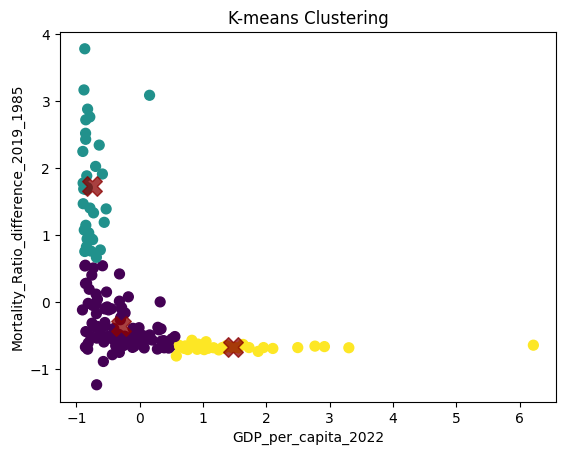

In [33]:
test.Draw_Clusters()

In [34]:
test.Print_Cluster_Info()

Cluster    | GDP_per_capita_2022 | Mortality_Ratio_difference_2019_1985
---------------------------------------------
Cluster 0   | -0.2994         | -0.3556        
Cluster 1   | -0.7593         | 1.7354         
Cluster 2   | 1.4695          | -0.6721        
cluster_id
0    [ALB, ARG, ARM, AZE, BEN, BGR, BIH, BLR, BRA, ...
1    [AFG, AGO, BDI, BFA, BGD, BOL, COD, COM, DJI, ...
2    [ARE, AUS, AUT, BEL, BHR, CAN, CHE, CYP, CZE, ...
dtype: object


/var/folders/n_/wmbdlzd17s7gcyvkql_0tn3c0000gq/T/ipykernel_44908/2404410997.py:162: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = self.df4Clustering.groupby('cluster_id').apply(lambda x: list(x.index))


,Countries
cluster_id,
0,"[ALB, ARG, ARM, AZE, BEN, BGR, BIH, BLR, BRA, ..."
1,"[AFG, AGO, BDI, BFA, BGD, BOL, COD, COM, DJI, ..."
2,"[ARE, AUS, AUT, BEL, BHR, CAN, CHE, CYP, CZE, ..."


In [35]:
test.og_df

,Births_per_woman_2019,Population_Density_2010,GDP_per_capita_2022,beds_per_1000,Maternal_mortality_ratio _2019,Population_2019,Adolescent_Birth_Rate_2019,GGHD_as_CHE_2019,VDem_2015,WBregion_2015,...,e_v2x_libdem_5C,e_v2x_liberal_5C,e_wbgi_gee,e_wbgi_pve,e_peedgini,e_miferrat,e_pechmor,e_pematmor,e_wb_pop,cluster_id
ABW,1.486,600.000000,NaN,NaN,NaN,109203.0,20.99,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,4.870,52.719133,1357.9878,0.34,644.0,37856121.0,NaN,3.0,36.0,7.0,...,0.00,0.25,-1.610,-2.703,NaN,5.15,58.08,NaN,38972230.0,1.0
AGO,5.442,15.306008,6118.9050,NaN,228.0,32375632.0,NaN,45.0,104.0,8.0,...,0.00,0.25,-1.258,-0.601,NaN,5.37,72.29,NaN,33428486.0,1.0
ALB,1.414,116.970803,12978.1010,2.91,5.0,2854191.0,NaN,43.0,12.0,3.0,...,0.50,1.00,-0.155,0.089,NaN,1.37,8.52,NaN,2837849.0,0.0
AND,NaN,180.561702,NaN,NaN,NaN,76474.0,2.53,71.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,1.546,NaN,NaN,NaN,NaN,1788891.0,NaN,NaN,NaN,NaN,...,0.50,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,3.963,45.557513,1959.3195,NaN,181.0,35111408.0,NaN,8.0,14.0,5.0,...,0.00,0.00,-2.362,-2.648,NaN,4.60,54.58,NaN,32284046.0,0.0
ZAF,2.475,41.162812,11415.8870,NaN,118.0,59587885.0,NaN,58.0,8.0,8.0,...,0.75,1.00,0.045,-0.253,NaN,2.26,32.09,NaN,58801927.0,0.0
ZMB,4.451,17.389257,3342.4214,NaN,129.0,18513839.0,NaN,33.0,61.0,8.0,...,0.25,0.75,-0.825,-0.131,NaN,4.32,54.50,NaN,18927715.0,1.0


In [36]:
test.Feature_Selection_Model(['Urban_population_percent_2019', 'Births_per_woman_2019'])
test.Make_Weights(set_weigths=1)
test.Clean_4_Modeling()

/var/folders/n_/wmbdlzd17s7gcyvkql_0tn3c0000gq/T/ipykernel_44908/2404410997.py:320: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.Xad.iloc[o_len:2*o_len, -1] = pd.to_numeric(self.og_df["Population_2019"] * (1 - self.og_df["Maternal_mortality_ratio _2019"] / 100000), errors = "coerce").round().astype('Int64')
/var/folders/n_/wmbdlzd17s7gcyvkql_0tn3c0000gq/T/ipykernel_44908/2404410997.py:37: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_temp = df_temp.applymap(


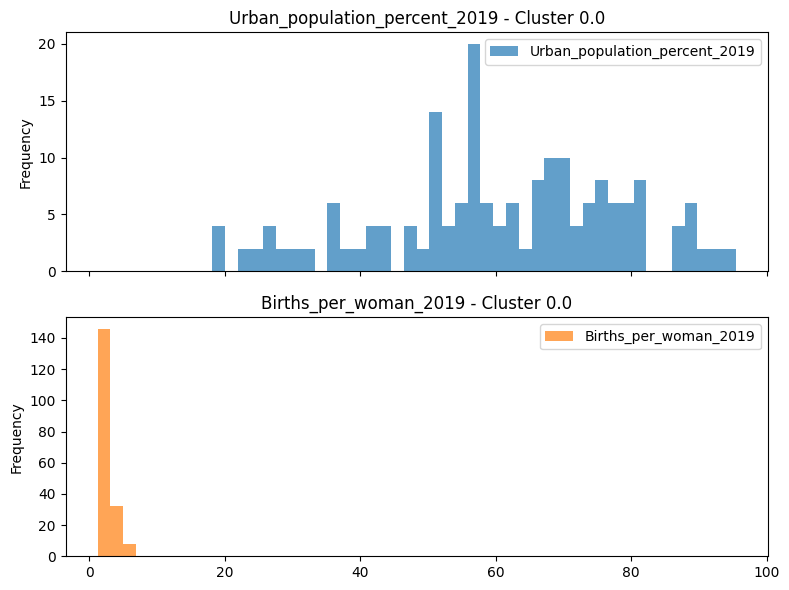

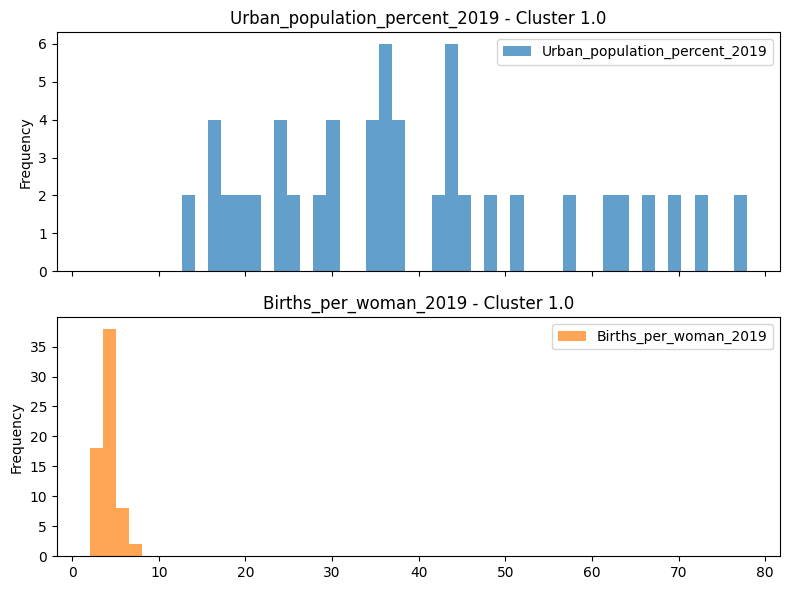

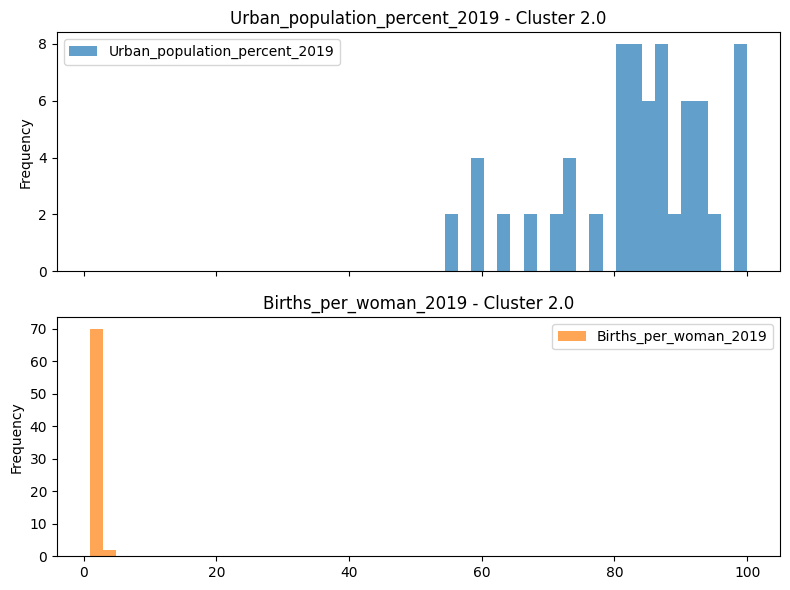

In [37]:
test.Plot_Feature_Distributions_Per_Cluster()

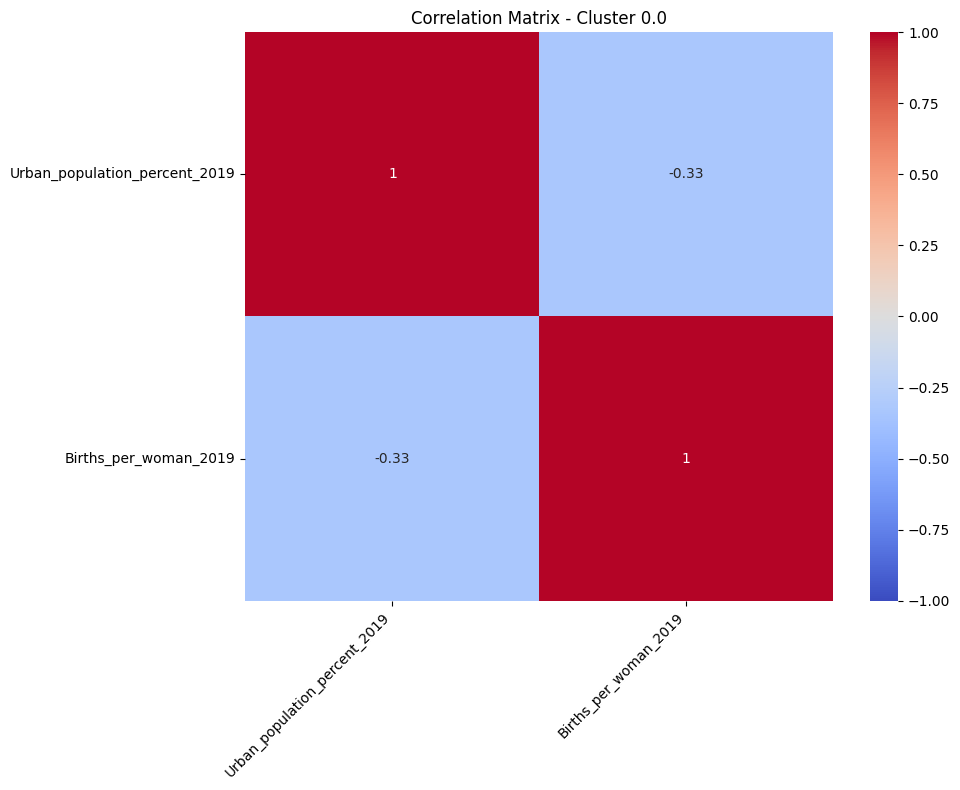

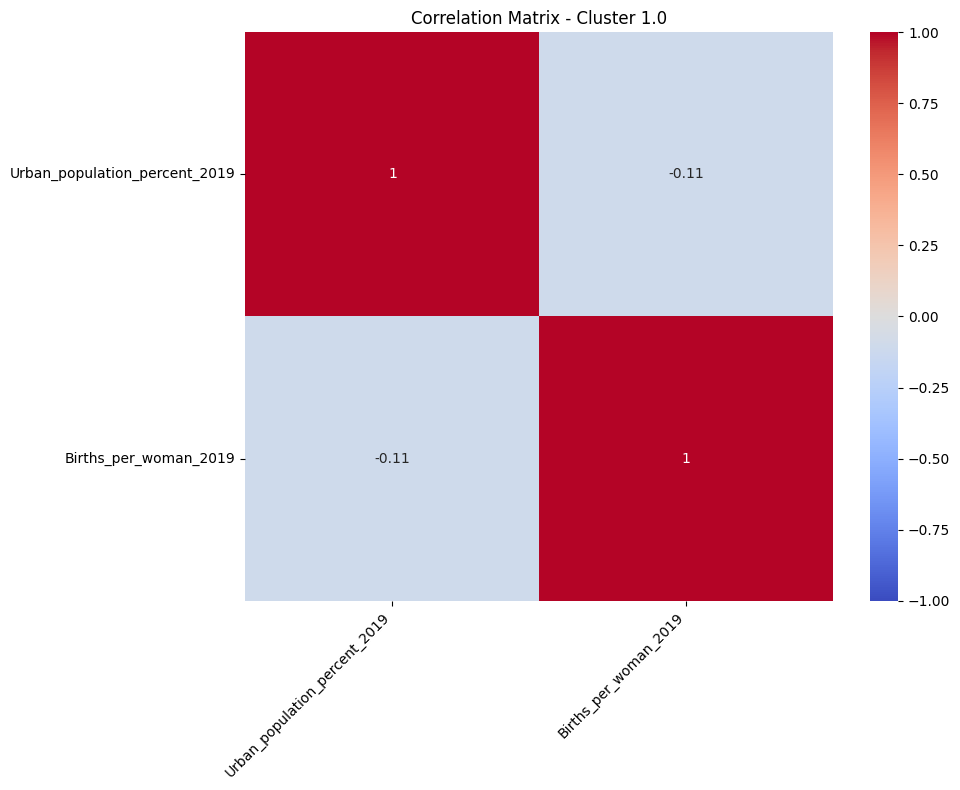

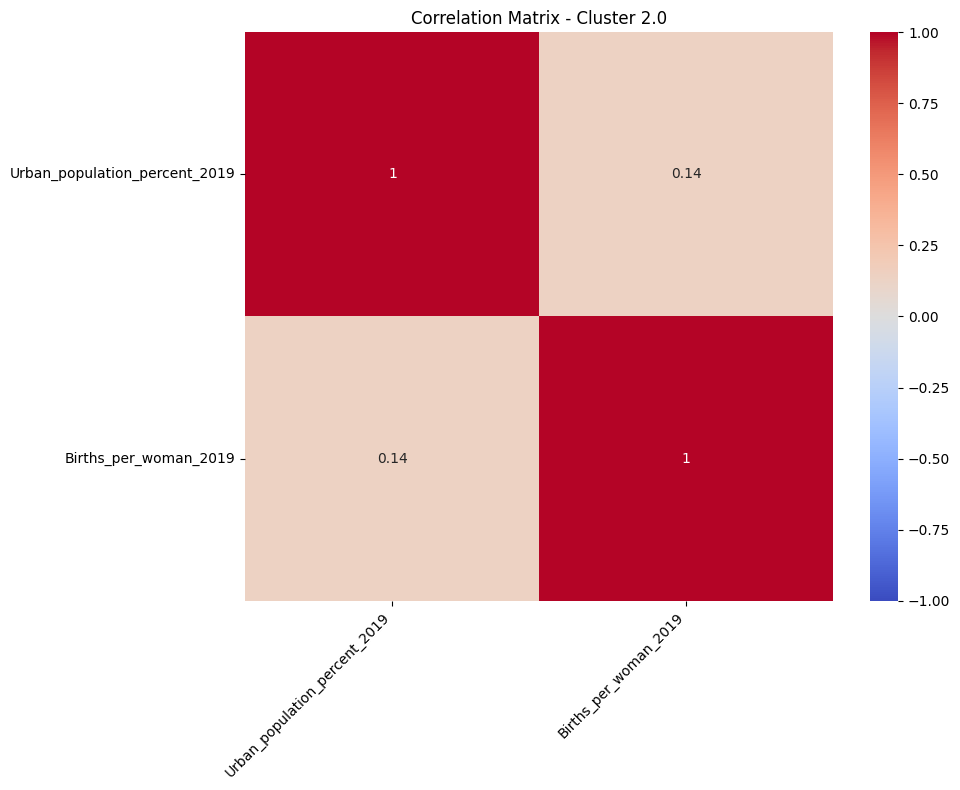

In [38]:
test.Plot_Correlations_Per_Cluster()

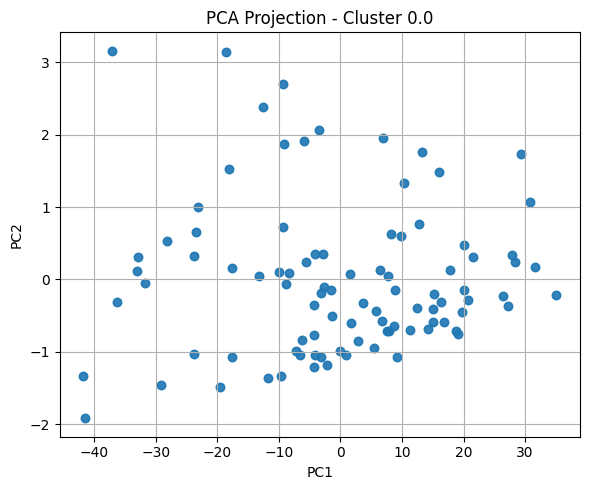

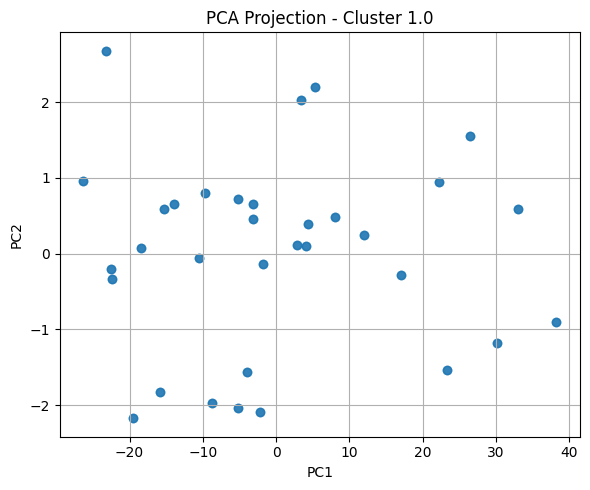

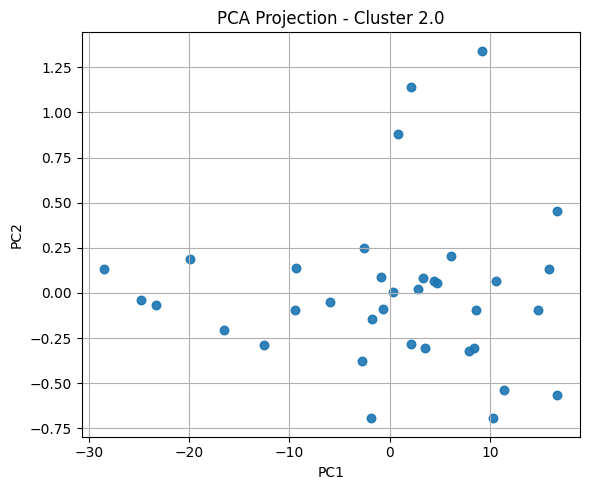

In [39]:
test.Plot_PCA_Per_Cluster()

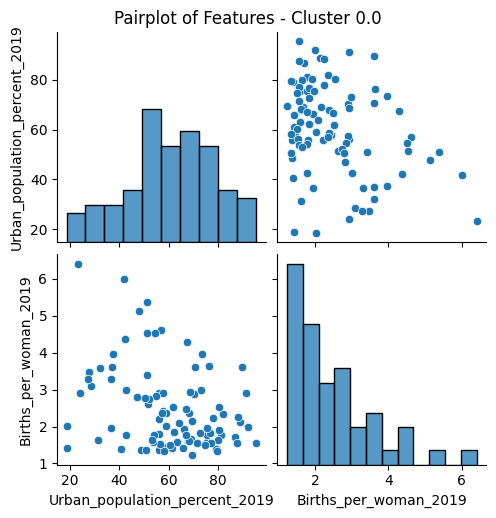

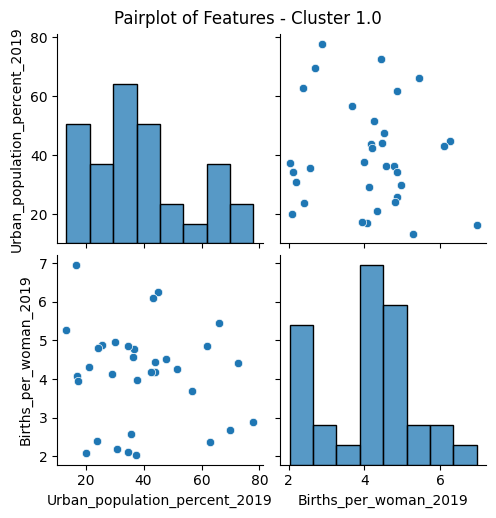

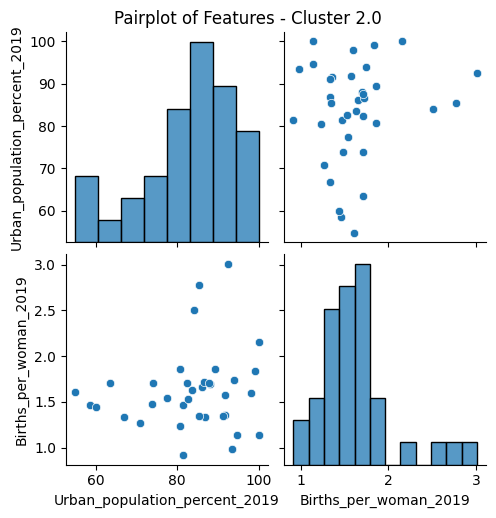

In [40]:
test.Plot_Pairplot_Per_Cluster()

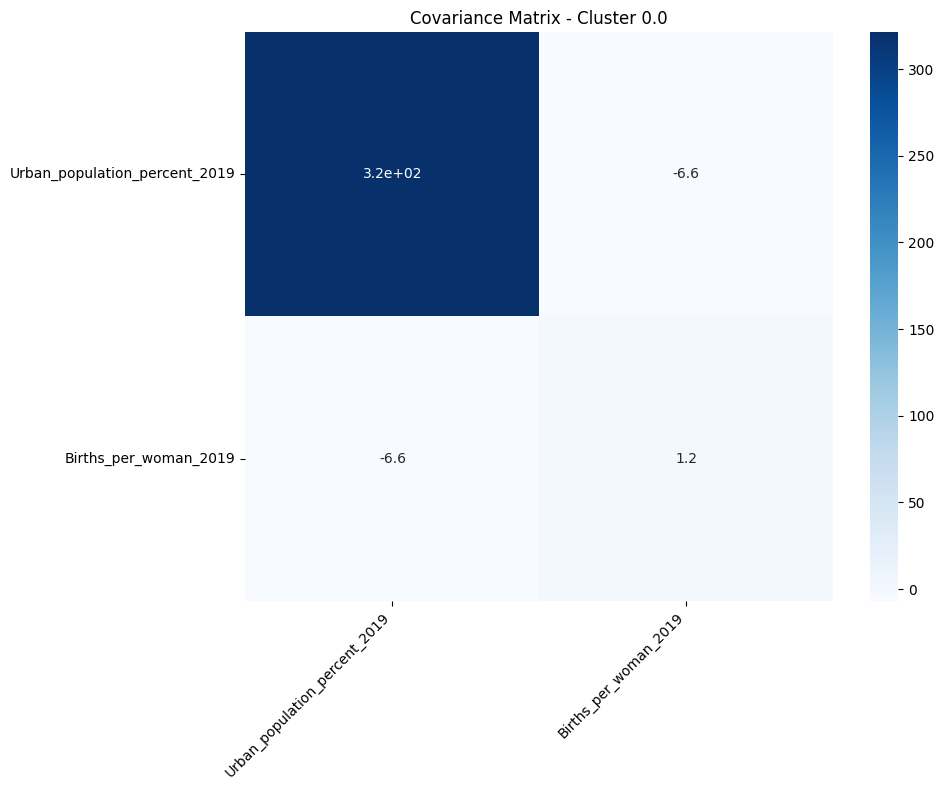

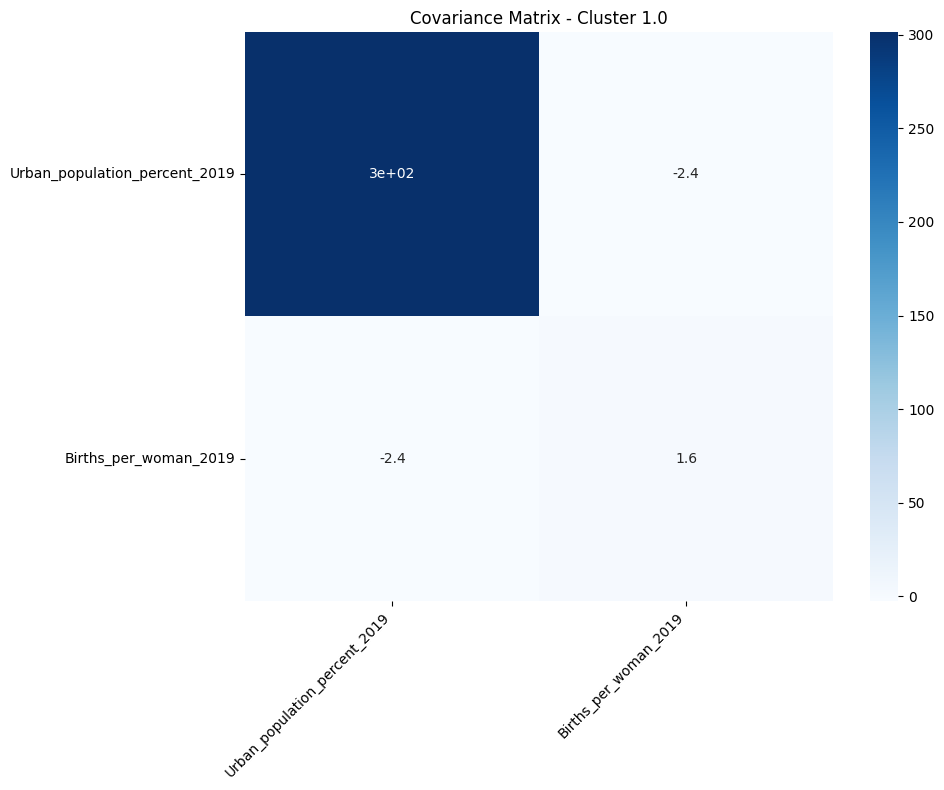

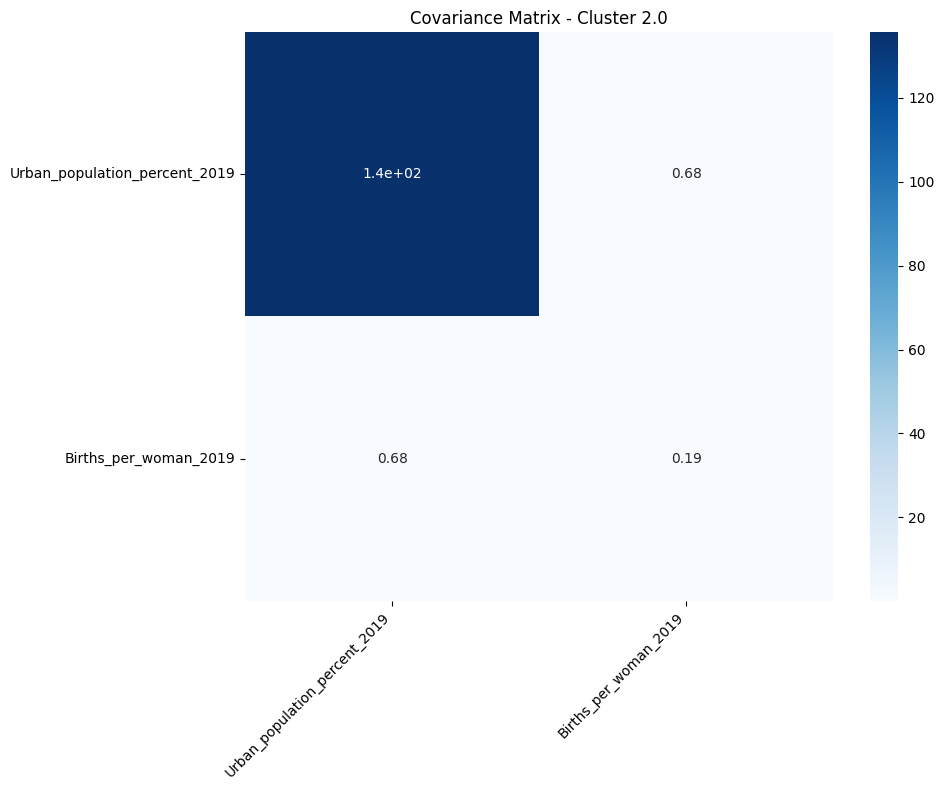

In [41]:
test.Plot_Covariances_Per_Cluster()

In [42]:
test.Clean_4_Modeling()
test.Xad.head(100)

/var/folders/n_/wmbdlzd17s7gcyvkql_0tn3c0000gq/T/ipykernel_44908/2404410997.py:37: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_temp = df_temp.applymap(


,Urban_population_percent_2019,Births_per_woman_2019,cluster_id,Alive,Weight
AFG_Dead,25.754,4.870,1.0,0,243793.0
AGO_Dead,66.177,5.442,1.0,0,73816.0
ALB_Dead,61.229,1.414,0.0,0,143.0
ARE_Dead,86.789,1.334,2.0,0,850.0
ARG_Dead,91.991,1.994,0.0,0,14841.0
...,...,...,...,...,...
MKD_Dead,58.208,1.340,0.0,0,56.0
MLI_Dead,43.136,6.103,1.0,0,90173.0
MLT_Dead,94.678,1.140,2.0,0,20.0
MMR_Dead,30.852,2.200,1.0,0,112125.0


In [43]:

### I believe that sth is not ok in this case with weights as all of them has alive = 1
test.Fit()

In [ ]:
test.Xad[test.features4model]

In [ ]:
test.Predict(test.Xad[test.features4model])

In [ ]:
# Produces a list of all the countries that are left after cleaning for clustering and features
country_list = list(test.Xad[test.Xad['cluster_id'] > -1].index)
country_list = country_list[:(len(country_list) // 2)]
country_list = [country[:3] for country in country_list]

test.WMSE(country_list, -1)

In [ ]:
country_list = list(test.Xad[test.Xad['cluster_id'] == 1].index)
country_list = country_list[:(len(country_list) // 2)]
country_list = [country[:3] for country in country_list]

country_list